In [4]:
using Piccolo
using LinearAlgebra
using CairoMakie
using QuantumToolbox
using SparseArrays

const ⊗ = kron

kron (generic function with 54 methods)

In [5]:
# set time parameters
T = 50
Δt = 0.2

# define drift and drive Hamiltonians
H_drift = 0.2 * PAULIS.Z
H_drives = [PAULIS.X, PAULIS.Y]

# create a QuantumSystem from the Hamiltonians
system = QuantumSystem(H_drift, H_drives)

# define target unitary
U_goal = GATES.X

# set bounds on the drive
a_bound = 0.2
dda_bound = 0.1

# build the problem
prob = UnitarySmoothPulseProblem(
    system,
    U_goal,
    T,
    Δt;
    a_bound = a_bound,
    dda_bound = dda_bound,
)

# solve the problem
solve!(prob; max_iter = 50)

    constructing UnitarySmoothPulseProblem...
	using integrator: typeof(UnitaryIntegrator)
	control derivative names: [:da, :dda]
	applying timesteps_all_equal constraint: Δt
    initializing optimizer...
        applying constraint: timesteps all equal constraint
        applying constraint: initial value of Ũ⃗
        applying constraint: initial value of a
        applying constraint: final value of a
        applying constraint: bounds on a
        applying constraint: bounds on da
        applying constraint: bounds on dda
        applying constraint: bounds on Δt
This is Ipopt version 3.14.17, running with linear solver MUMPS 5.8.0.

Number of nonzeros in equality constraint Jacobian...:     5502
Number of nonzeros in inequality constraint Jacobian.:        0
Number of nonzeros in Lagrangian Hessian.............:     2739

Total number of variables............................:      738
                     variables with only lower bounds:        0
                variables with 

In [6]:
unitary_rollout_fidelity(prob.trajectory, system)

0.9999924272209646

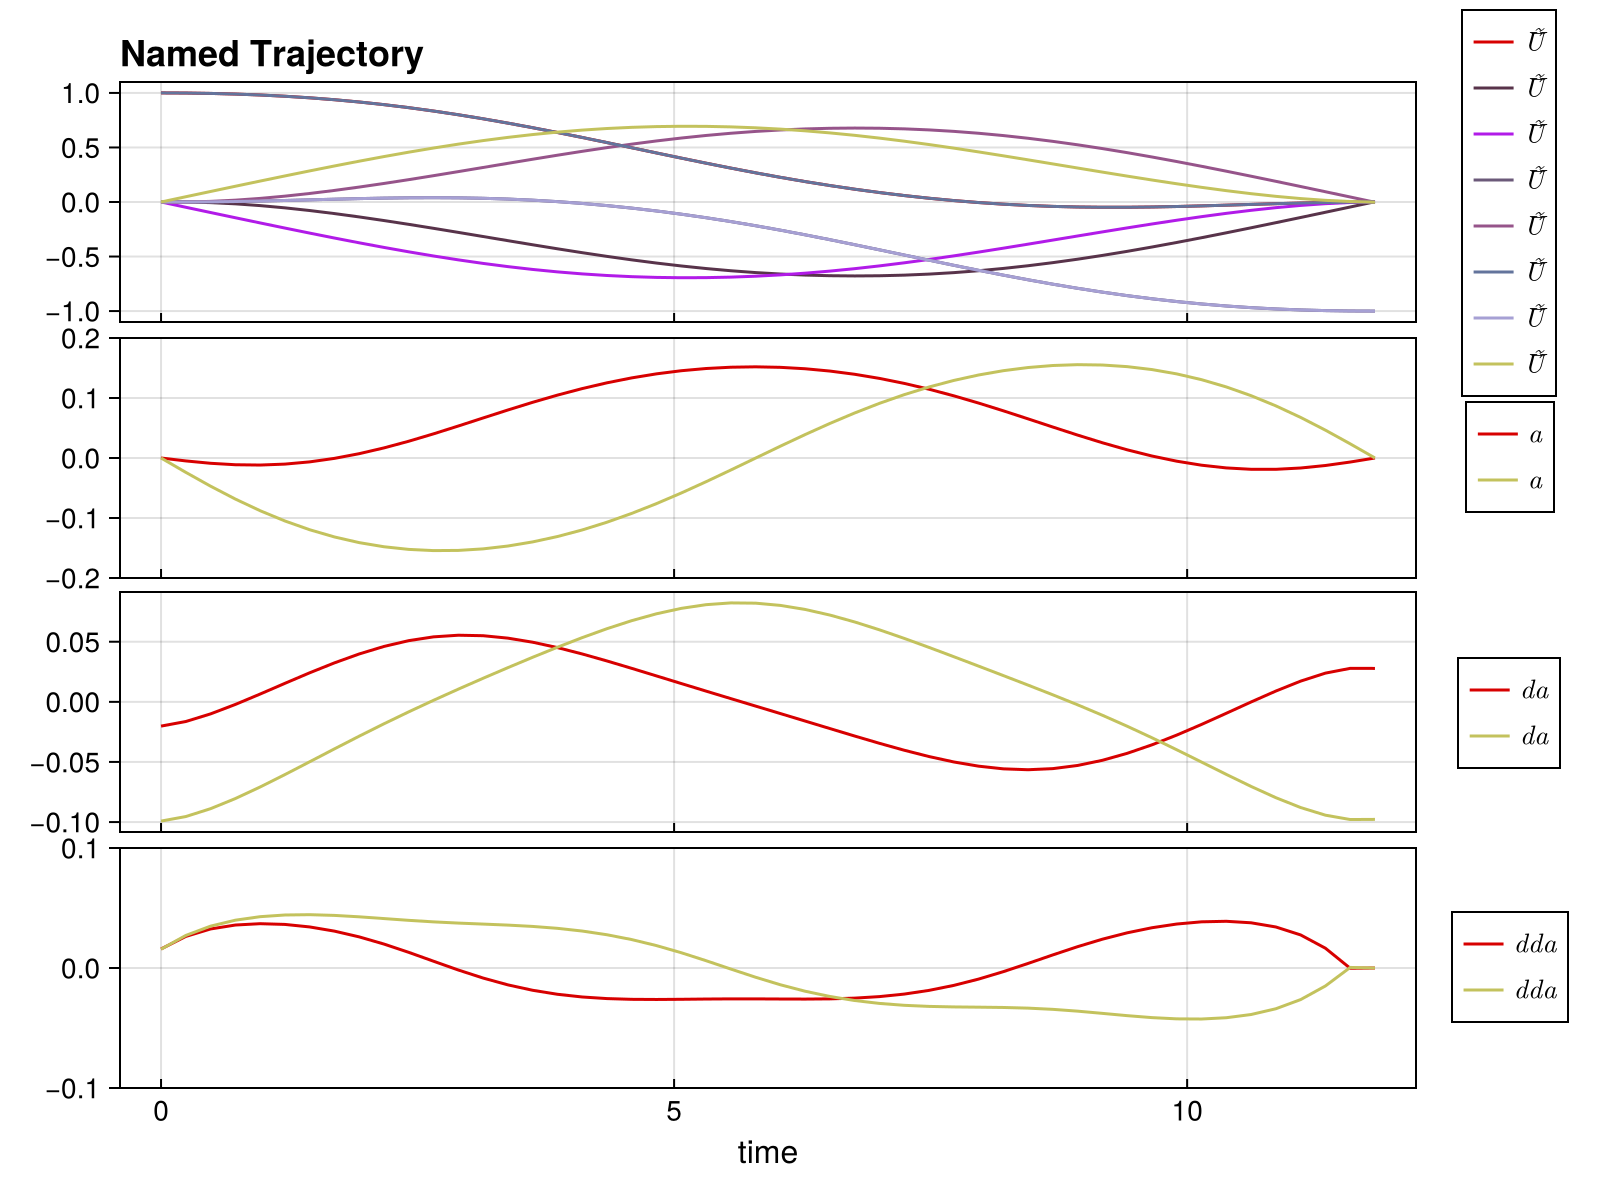

In [7]:
fig = plot(prob.trajectory, merge=true)

original_duration = get_duration(prob.trajectory)

for axis in fig.content
   if axis isa Axis
       # set the x-axis limits
       xlims!(axis, (-2*Δt, original_duration + 2*Δt))
   end
end

fig

In [ ]:
# min time

prob_min_time = UnitaryMinimumTimeProblem(prob, U_goal);
println("Duration before: ", get_duration(prob.trajectory))
solve!(prob_min_time; max_iter = 50)

    constructing UnitaryMinimumTimeProblem...
	final fidelity: 1.0
Duration before: 11.830401388498382
    initializing optimizer...
        applying constraint: timesteps all equal constraint
        applying constraint: initial value of Ũ⃗
        applying constraint: initial value of a
        applying constraint: final value of a
        applying constraint: bounds on a
        applying constraint: bounds on da
        applying constraint: bounds on dda
        applying constraint: bounds on Δt
This is Ipopt version 3.14.17, running with linear solver MUMPS 5.8.0.

Number of nonzeros in equality constraint Jacobian...:     3962
Number of nonzeros in inequality constraint Jacobian.:        8
Number of nonzeros in Lagrangian Hessian.............:     2775

Total number of variables............................:      738
                     variables with only lower bounds:        0
                variables with lower and upper bounds:      246
                     variables with onl

In [11]:
println("Duration after: ", get_duration(prob_min_time.trajectory))
println("Fidelity: ", unitary_rollout_fidelity(prob_min_time.trajectory, system))

Duration after: 7.9094919541388915
Fidelity: 0.9999999927492209


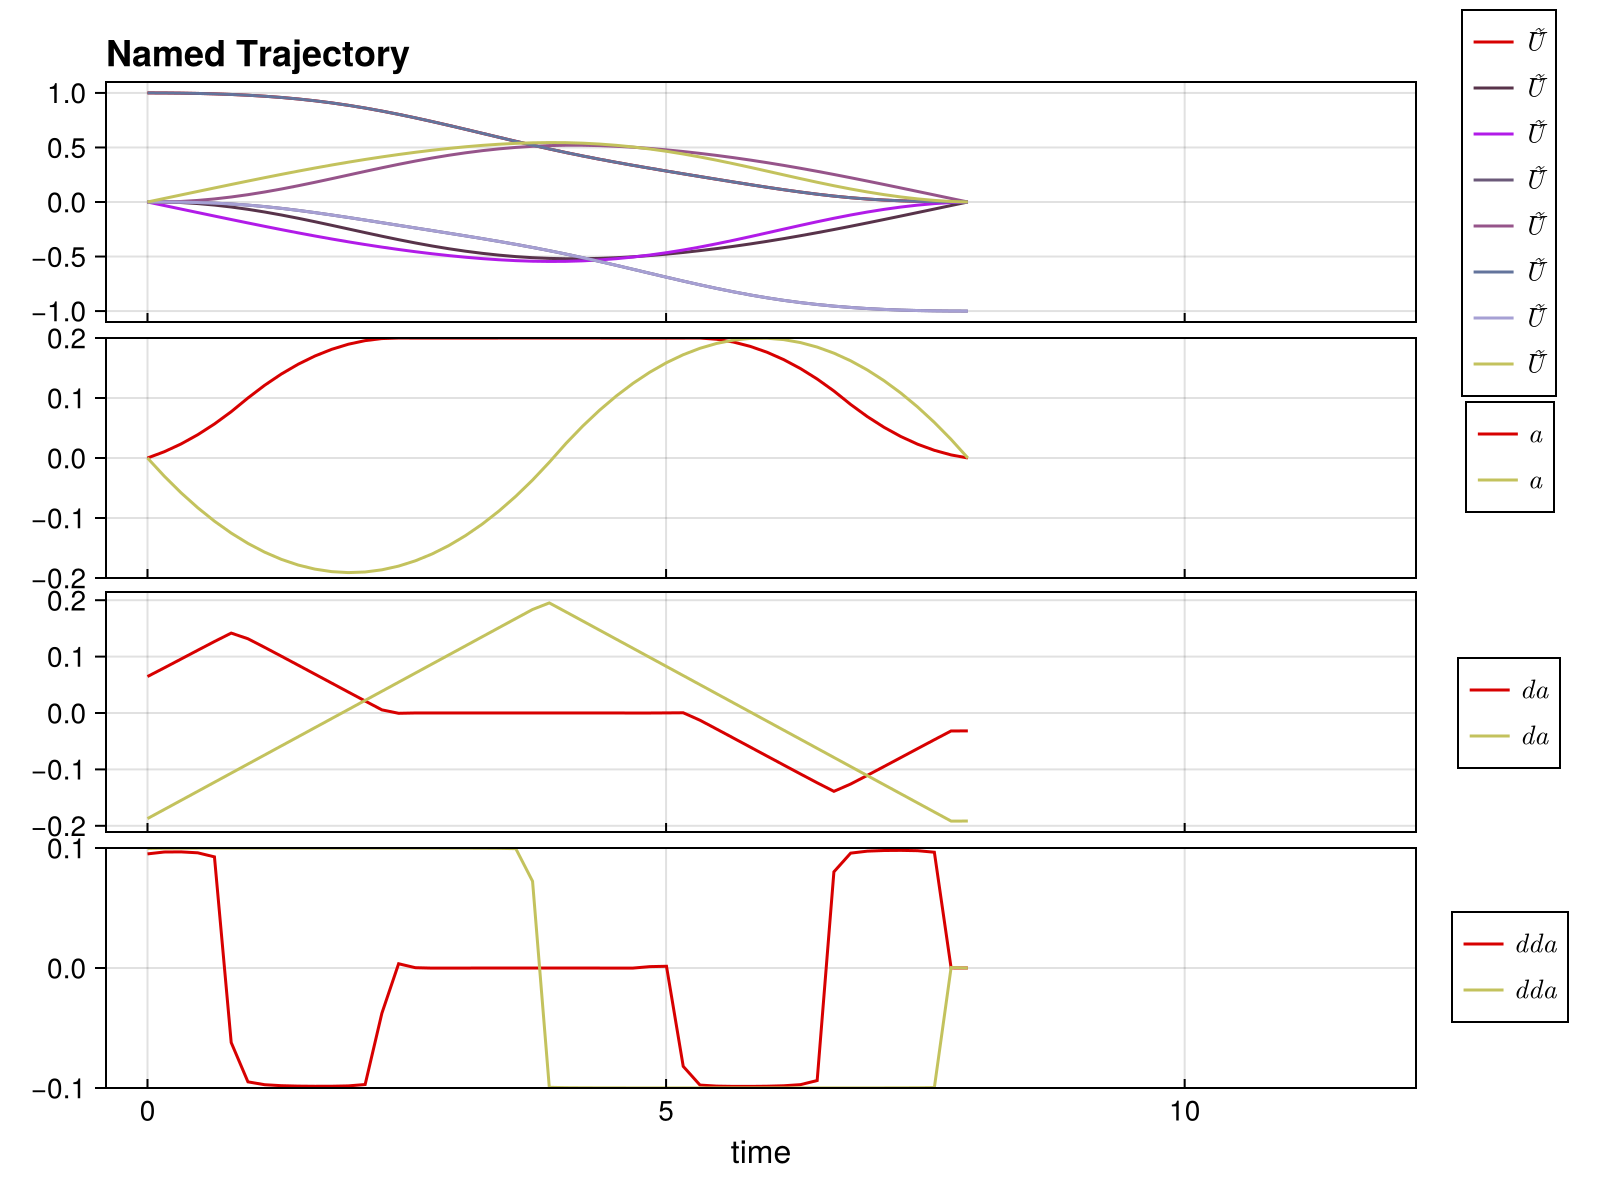

In [12]:
fig = plot(prob.trajectory, merge=true)
for axis in fig.content
   if axis isa Axis
       # set the x-axis limits
       xlims!(axis, (-2*Δt, original_duration + 2*Δt))
   end
end

fig